# Titanic Case Study

In [1]:
# Let's code some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://query.data.world/s/gb5wjsz5c76sgfyeas22h4loq7syqt")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## What were the important columns that contributed in the survival of the passenger
## 1. Sex
## 2. Age
## 3. Class

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
## Nulls Percenatge
100*(df.isnull().sum()/df.shape[0])

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Fare'].quantile(0.75)

31.0

In [8]:
# Out of the total passengers, what is the percentage of females those survived the incident?
pd.crosstab(df.Survived, df.Sex, normalize = True)

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


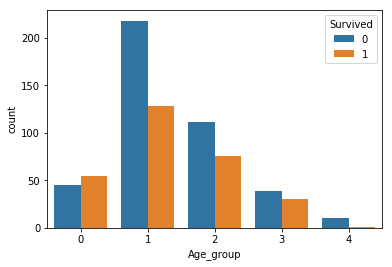

In [9]:
# Now bucket the age variable into 4 groups defined as: 
# "Age" <= 16: 0
# > 16  & <= 32 :1
# > 32 & <= 48 :2
# > 48 & <= 64 :3
# "Age" > 64 :4
# Which age group survived the most?
df['Age_group'] = pd.cut(df.Age, bins = [0, 16, 32, 48, 64, 200], labels = [0,1,2,3,4])
sns.countplot("Age_group", hue = "Survived", data = df)

### Missing value Handling

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [11]:
## Drop columns that are not needed for modelling
df.drop(['Age_group', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [12]:
df.drop('Name', axis = 1, inplace = True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [14]:
# Percentage of missing values
100*(df.isnull().sum()/df.shape[0])

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [15]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# Imputing Embarked with Category S as it is present for max times
df['Embarked'] = df['Embarked'].fillna('S')

In [17]:
# Percentage of missing values
100*(df.isnull().sum()/df.shape[0])

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.000000
dtype: float64

In [18]:
## Let's drop Cabin Column
df.drop('Cabin', axis =1, inplace = True)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
# Iterative Imputer
# Needs all the columns in Numerical Format
df['Sex'].replace(['female', 'male'], [0,1], inplace = True)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [22]:
## Label Encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [23]:
## Here: Embarked -- Numerical: Iterative Imputer
## When we will do modelling: Dummy variable creartion
## If your cat orderd: Lable
## Dummy Variable

In [25]:
!pip install fancyimpute
from fancyimpute import IterativeImputer

  Using cached https://files.pythonhosted.org/packages/d9/ed/90e0a13ad7ac4e7cdc2aeaefed26cebb4922f205bb778199268863fa2fbe/cvxpy-1.0.25.tar.gz
  Using cached https://files.pythonhosted.org/packages/b9/3a/59aa93b573a22fda44402383aeddcc2a081c31e61080af3da9d11855c77a/ecos-2.0.7.post1.tar.gz
  Using cached https://files.pythonhosted.org/packages/f2/6e/dbdd778c64c1920ae357a2013ea655d65a1f8b60f397d6e5549e4aafe8ec/scs-2.1.1-2.tar.gz
  Complete output from command C:\Users\rachit\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\rachit\\AppData\\Local\\Temp\\pip-install-891grlyj\\cvxpy\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\rachit\AppData\Local\Temp\pip-wheel-k7_6_kdy --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\cvxpy
  copying c

  Failed building wheel for cvxpy
  Failed building wheel for ecos
  Failed building wheel for scs
Command "C:\Users\rachit\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\rachit\\AppData\\Local\\Temp\\pip-install-891grlyj\\ecos\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\rachit\AppData\Local\Temp\pip-record-fi8d777h\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\rachit\AppData\Local\Temp\pip-install-891grlyj\ecos\


ModuleNotFoundError: No module named 'fancyimpute'